<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/multiplication_pattern/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n20.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.759225,90.134692,97.854178,0.000021,274.748117,274.748086,0.000030
1,0.0,1.0,45.663213,73.383827,51.221360,0.000022,180.268423,180.268407,0.000015
2,0.0,2.0,98.762956,71.986578,93.532224,-0.000041,274.281718,274.281748,-0.000031
3,0.0,3.0,80.619109,68.889236,78.599740,0.000024,238.108109,238.108082,0.000026
4,0.0,4.0,57.051402,24.055053,25.995550,-0.000032,117.101973,117.102032,-0.000059
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,57.982075,24.192152,85.783019,-0.000140,177.957106,177.957168,-0.000062
249996,999.0,246.0,44.364121,54.289625,20.753167,-0.000001,129.406911,129.406863,0.000049
249997,999.0,247.0,61.824957,29.665486,37.036830,-0.000539,138.526734,138.527176,-0.000442
249998,999.0,248.0,87.963761,85.903758,80.096823,-0.000007,263.964335,263.964360,-0.000025


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.759225,90.134692,97.854178,0.000021,274.748117,274.748086,0.000030
1,0.0,1.0,45.663213,73.383827,51.221360,0.000022,180.268423,180.268407,0.000015
2,0.0,2.0,98.762956,71.986578,93.532224,-0.000041,274.281718,274.281748,-0.000031
3,0.0,3.0,80.619109,68.889236,78.599740,0.000024,238.108109,238.108082,0.000026
4,0.0,4.0,57.051402,24.055053,25.995550,-0.000032,117.101973,117.102032,-0.000059
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,57.982075,24.192152,85.783019,-0.000140,177.957106,177.957168,-0.000062
249996,999.0,246.0,44.364121,54.289625,20.753167,-0.000001,129.406911,129.406863,0.000049
249997,999.0,247.0,61.824957,29.665486,37.036830,-0.000539,138.526734,138.527176,-0.000442
249998,999.0,248.0,87.963761,85.903758,80.096823,-0.000007,263.964335,263.964360,-0.000025


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.759225  90.134692  97.854178  ...  274.748117  274.748086  0.000030
      1.0    45.663213  73.383827  51.221360  ...  180.268423  180.268407  0.000015
      2.0    98.762956  71.986578  93.532224  ...  274.281718  274.281748 -0.000031
      3.0    80.619109  68.889236  78.599740  ...  238.108109  238.108082  0.000026
      4.0    57.051402  24.055053  25.995550  ...  117.101973  117.102032 -0.000059
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  57.982075  24.192152  85.783019  ...  177.957106  177.957168 -0.000062
      246.0  44.364121  54.289625  20.753167  ...  129.406911  129.406863  0.000049
      247.0  61.824957  29.665486  37.036830  ...  138.526734  138.527176 -0.000442
      248.0  87.963761  85.903758  80.096823  ...  263.964335  263.964360 -0.000025
      249.0  83.100072  49.566902  32.898743  ...  175.565702  175.565645  0.000057

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.759225  90.134692  97.854178  ...  274.748117  274.748086  0.000030
      1.0    45.663213  73.383827  51.221360  ...  180.268423  180.268407  0.000015
      2.0    98.762956  71.986578  93.532224  ...  274.281718  274.281748 -0.000031
      3.0    80.619109  68.889236  78.599740  ...  238.108109  238.108082  0.000026
      4.0    57.051402  24.055053  25.995550  ...  117.101973  117.102032 -0.000059
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  57.982075  24.192152  85.783019  ...  177.957106  177.957168 -0.000062
      246.0  44.364121  54.289625  20.753167  ...  129.406911  129.406863  0.000049
      247.0  61.824957  29.665486  37.036830  ...  138.526734  138.527176 -0.000442
      248.0  87.963761  85.903758  80.096823  ...  263.964335  263.964360 -0.000025
      249.0  83.100072  49.566902  32.898743  ...  175.565702  175.565645  0.000057

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.759225,90.134692,97.854178,0.000021,274.748117,274.748086,0.000030
1,0.0,1.0,45.663213,73.383827,51.221360,0.000022,180.268423,180.268407,0.000015
2,0.0,2.0,98.762956,71.986578,93.532224,-0.000041,274.281718,274.281748,-0.000031
3,0.0,3.0,80.619109,68.889236,78.599740,0.000024,238.108109,238.108082,0.000026
4,0.0,4.0,57.051402,24.055053,25.995550,-0.000032,117.101973,117.102032,-0.000059
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,57.982075,24.192152,85.783019,-0.000140,177.957106,177.957168,-0.000062
249996,999.0,246.0,44.364121,54.289625,20.753167,-0.000001,129.406911,129.406863,0.000049
249997,999.0,247.0,61.824957,29.665486,37.036830,-0.000539,138.526734,138.527176,-0.000442
249998,999.0,248.0,87.963761,85.903758,80.096823,-0.000007,263.964335,263.964360,-0.000025


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.759225  90.134692  97.854178  ...  274.748117  274.748086  0.000030
      1.0    45.663213  73.383827  51.221360  ...  180.268423  180.268407  0.000015
      2.0    98.762956  71.986578  93.532224  ...  274.281718  274.281748 -0.000031
      3.0    80.619109  68.889236  78.599740  ...  238.108109  238.108082  0.000026
      4.0    57.051402  24.055053  25.995550  ...  117.101973  117.102032 -0.000059
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  57.982075  24.192152  85.783019  ...  177.957106  177.957168 -0.000062
      246.0  44.364121  54.289625  20.753167  ...  129.406911  129.406863  0.000049
      247.0  61.824957  29.665486  37.036830  ...  138.526734  138.527176 -0.000442
      248.0  87.963761  85.903758  80.096823  ...  263.964335  263.964360 -0.000025
      249.0  83.100072  49.566902  32.898743  ...  175.565702  175.565645  0.000057

[250000 rows x 7 columns]

In [14]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

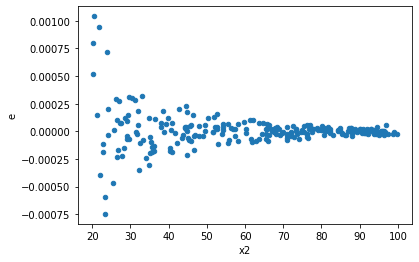

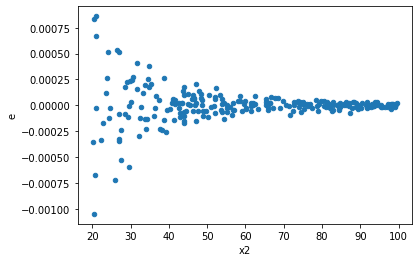

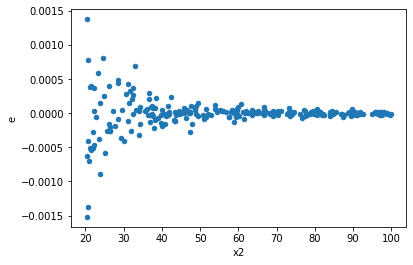

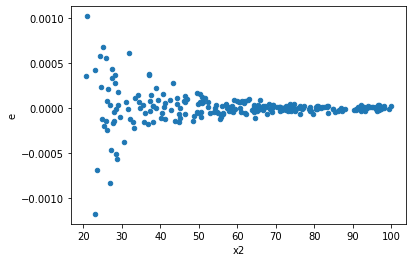

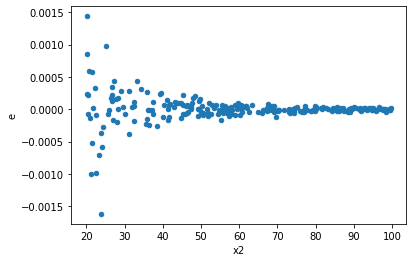

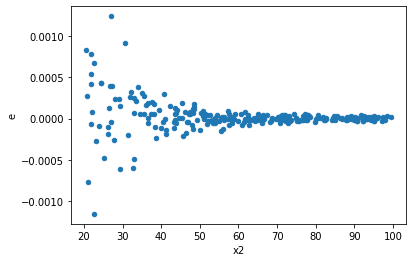

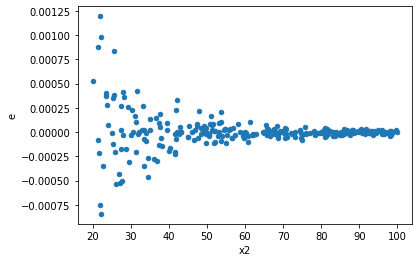

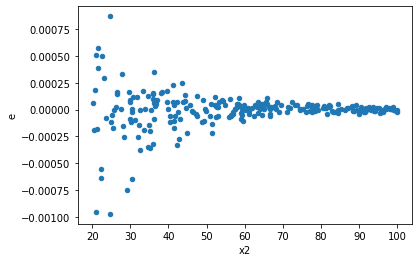

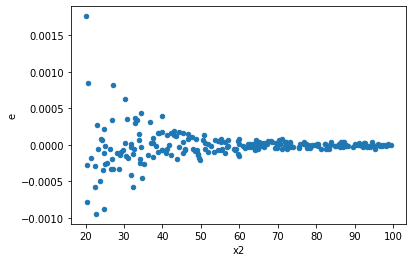

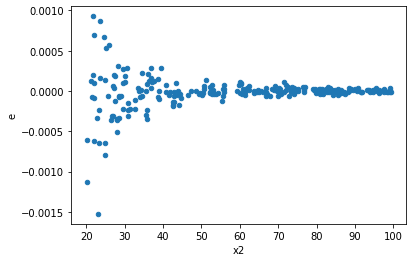

In [15]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,6.299746341867542e-08,6.310112179160192e-06,6.562235772778689e-10,6.573033519958533e-08,0.009983572657667032,4.5995985537101036e-70,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,6.917949931639988e-08,7.381606560308674e-06,7.206197845458321e-10,7.689173500321535e-08,0.009371875722607875,2.269538180407295e-71,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,6.494897789282288e-08,1.4165992016174258e-05,6.765518530502383e-10,1.4756241683514853e-07,0.0045848520752140975,3.110437447719619e-86,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,5.690960416047139e-08,8.050358822102755e-06,5.92808376671577e-10,8.38579043969037e-08,0.007069200940984465,3.2438924241895202e-77,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,6.440490235148993e-08,1.2313493013477023e-05,6.708843994946868e-10,1.2826555222371899e-07,0.005230433174485847,1.7422295435470012e-83,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,6.113794772358361e-08,9.335085127954173e-06,6.368536221206626e-10,9.724047008285597e-08,0.006549265152441333,8.380272241094458e-79,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,6.421883766769367e-08,9.311513737748642e-06,6.689462257051424e-10,9.699493476821502e-08,0.00689671298097882,9.949911382242737e-78,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,6.705044403669596e-08,7.306919730807481e-06,6.984421253822495e-10,7.611374719591127e-08,0.009176294048229032,8.312151903969733e-72,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,7.71790083451123e-08,1.0917280142687394e-05,8.039480035949199e-10,1.1372166815299369e-07,0.0070694355495501595,3.249045951250991e-77,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64